In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic_df = pd.read_csv("Titanic-Dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Cabin'].fillna('Unknown', inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

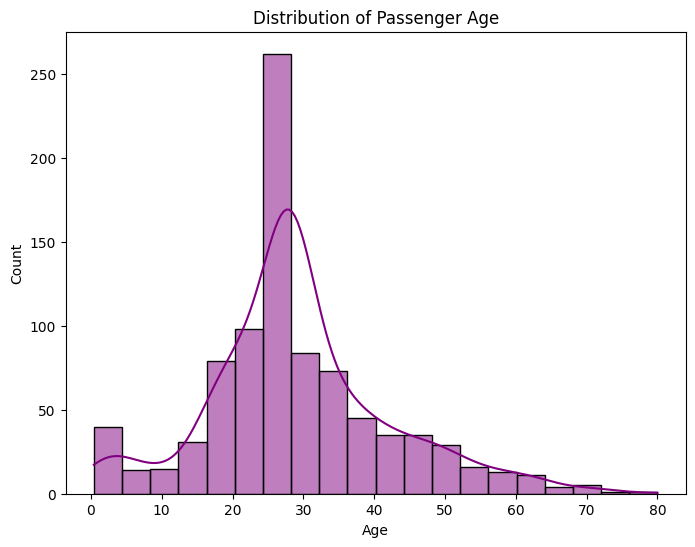

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['Age'], bins=20, kde=True, color="purple")
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [35]:
palette = sns.color_palette("mako_r")

<ipython-input-36-2876b74eb32d>:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette=palette)


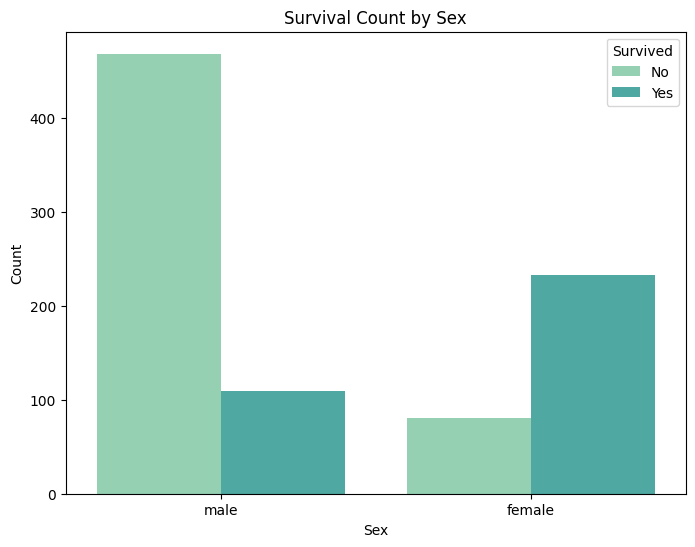

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette=palette)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

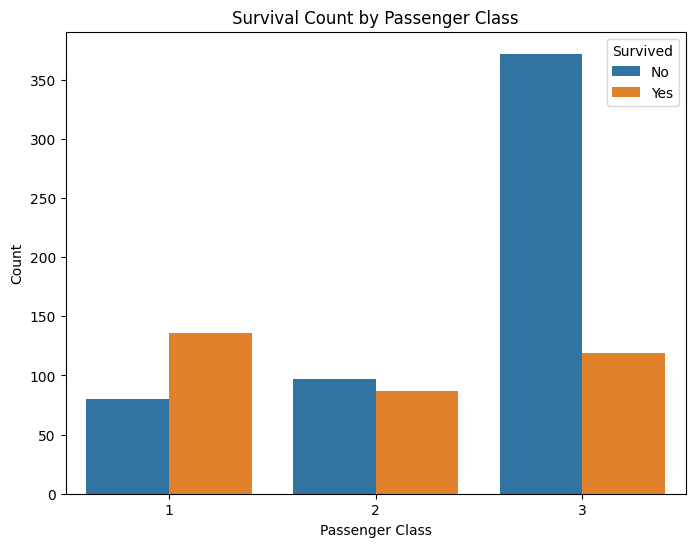

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

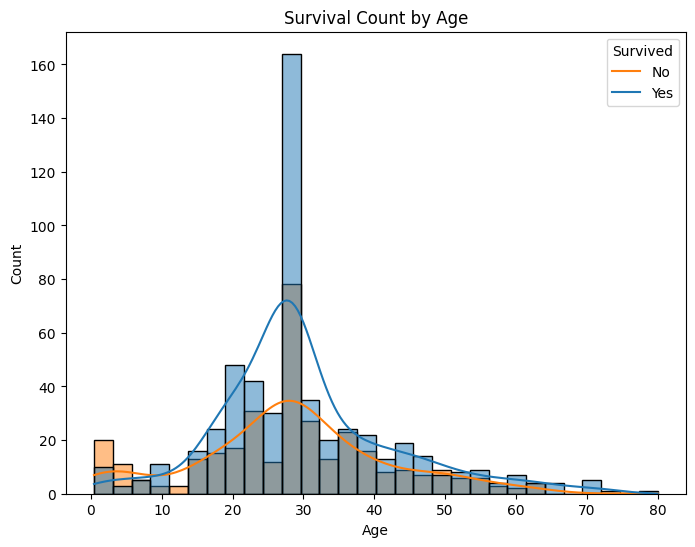

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Survived', data=titanic_df, kde=True)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

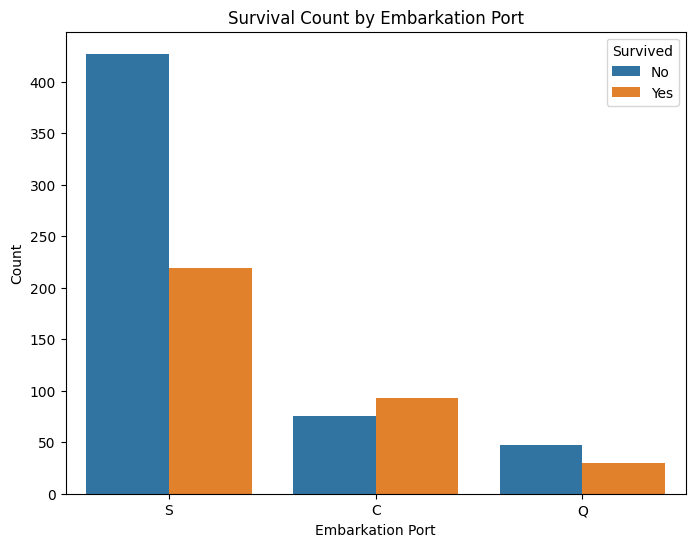

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [31]:
numeric_cols = titanic_df.select_dtypes(include=np.number).columns
correlation_df = titanic_df[numeric_cols].corr()

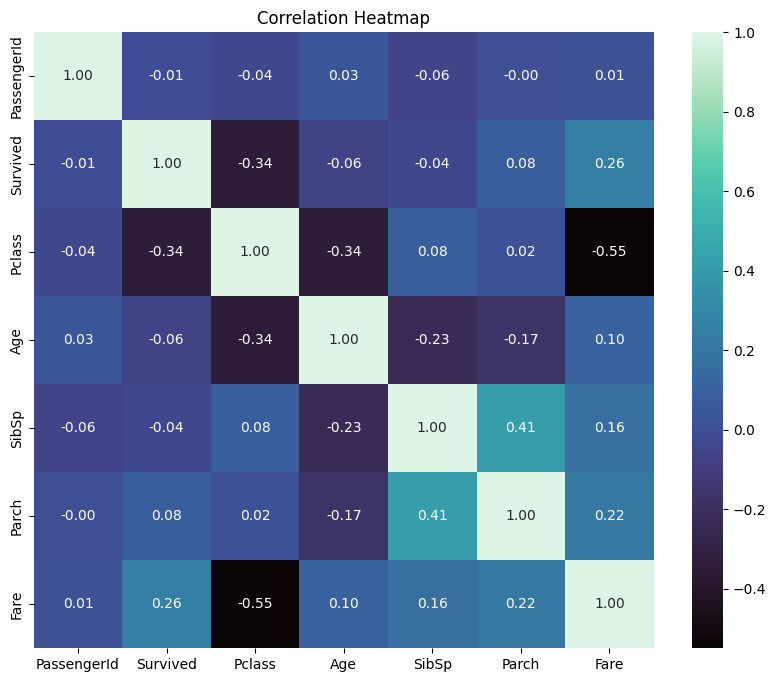

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()